# 最近邻插值

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
src = cv2.imread('../datas/f2.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
rgb_f = rgb.astype(np.float32)

In [21]:
def nn_interpolate(image, scale_factor):

    # Extract size
    rows, cols = image.shape[0],image.shape[1]
    scaled_height = int(np.floor(rows * scale_factor))
    scaled_weight = int(np.floor(cols * scale_factor))

    # Compute ratio
    row_ratio = rows / scaled_height
    col_ratio = cols / scaled_weight

    row_position = np.floor(np.arange(scaled_height) * row_ratio).astype(int)
    column_position = np.floor(np.arange(scaled_weight) * col_ratio).astype(int)

    # Initialize scaled image
    scaled_image = np.zeros((scaled_height, scaled_weight), np.uint8)

    for i in range(scaled_height):
        for j in range(scaled_weight):
            scaled_image[i, j] = image[row_position[i], column_position[j]]

    return scaled_image

In [22]:
dst = nn_interpolate(gray,2)

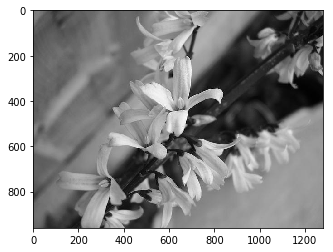

In [24]:
plt.imshow(dst,'gray')